In [ ]:
!pip install clickhouse-driver pandas matplotlib seaborn

In [23]:
from clickhouse_driver import Client
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Подключение к ClickHouse
client = Client(host='localhost', user='default', password='your_password')


In [24]:
query = """
SELECT
    RegistrationDate AS RegistrationDay,
    COUNT(UserID) AS TotalUsers
FROM Users
GROUP BY RegistrationDay
ORDER BY RegistrationDay ASC
"""

data = client.execute(query)
df = pd.DataFrame(data, columns=['RegistrationDay', 'TotalUsers'])

print(df)

  RegistrationDay  TotalUsers
0      2024-12-01           3
1      2024-12-02           2
2      2024-12-03           2
3      2024-12-04           2


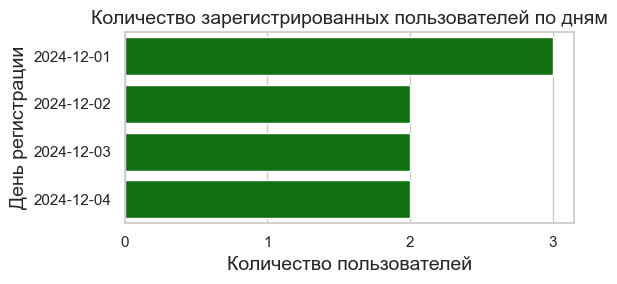

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 3))
sns.barplot(y=pd.to_datetime(df['RegistrationDay']), x=df['TotalUsers'], color='green', orient='h')

# Настройка подписей
plt.title('Количество зарегистрированных пользователей по дням', fontsize=14)
plt.xlabel('Количество пользователей', fontsize=14)
plt.ylabel('День регистрации', fontsize=14)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()

# Показ графика
plt.show()